In [1]:
#visualise count of transactions over hours (when does it happen the most)
#distribution chart of amount
#correlation among features
#unbalanced data -> undersampling technique

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_cct = pd.read_parquet("/home/onyxia/work/cct.parquet")
df_cct

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,None,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,None,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,None,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,None,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,None,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,None,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,None,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,None,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,None,No


In [4]:
#Un peu de nettoyage

df_cct["Amount"] = df_cct["Amount"].str.replace("$","")
df_cct["Amount"] = df_cct["Amount"].astype(float)

/tmp/ipykernel_17106/2672614027.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cct["Amount"] = df_cct["Amount"].str.replace("$","")


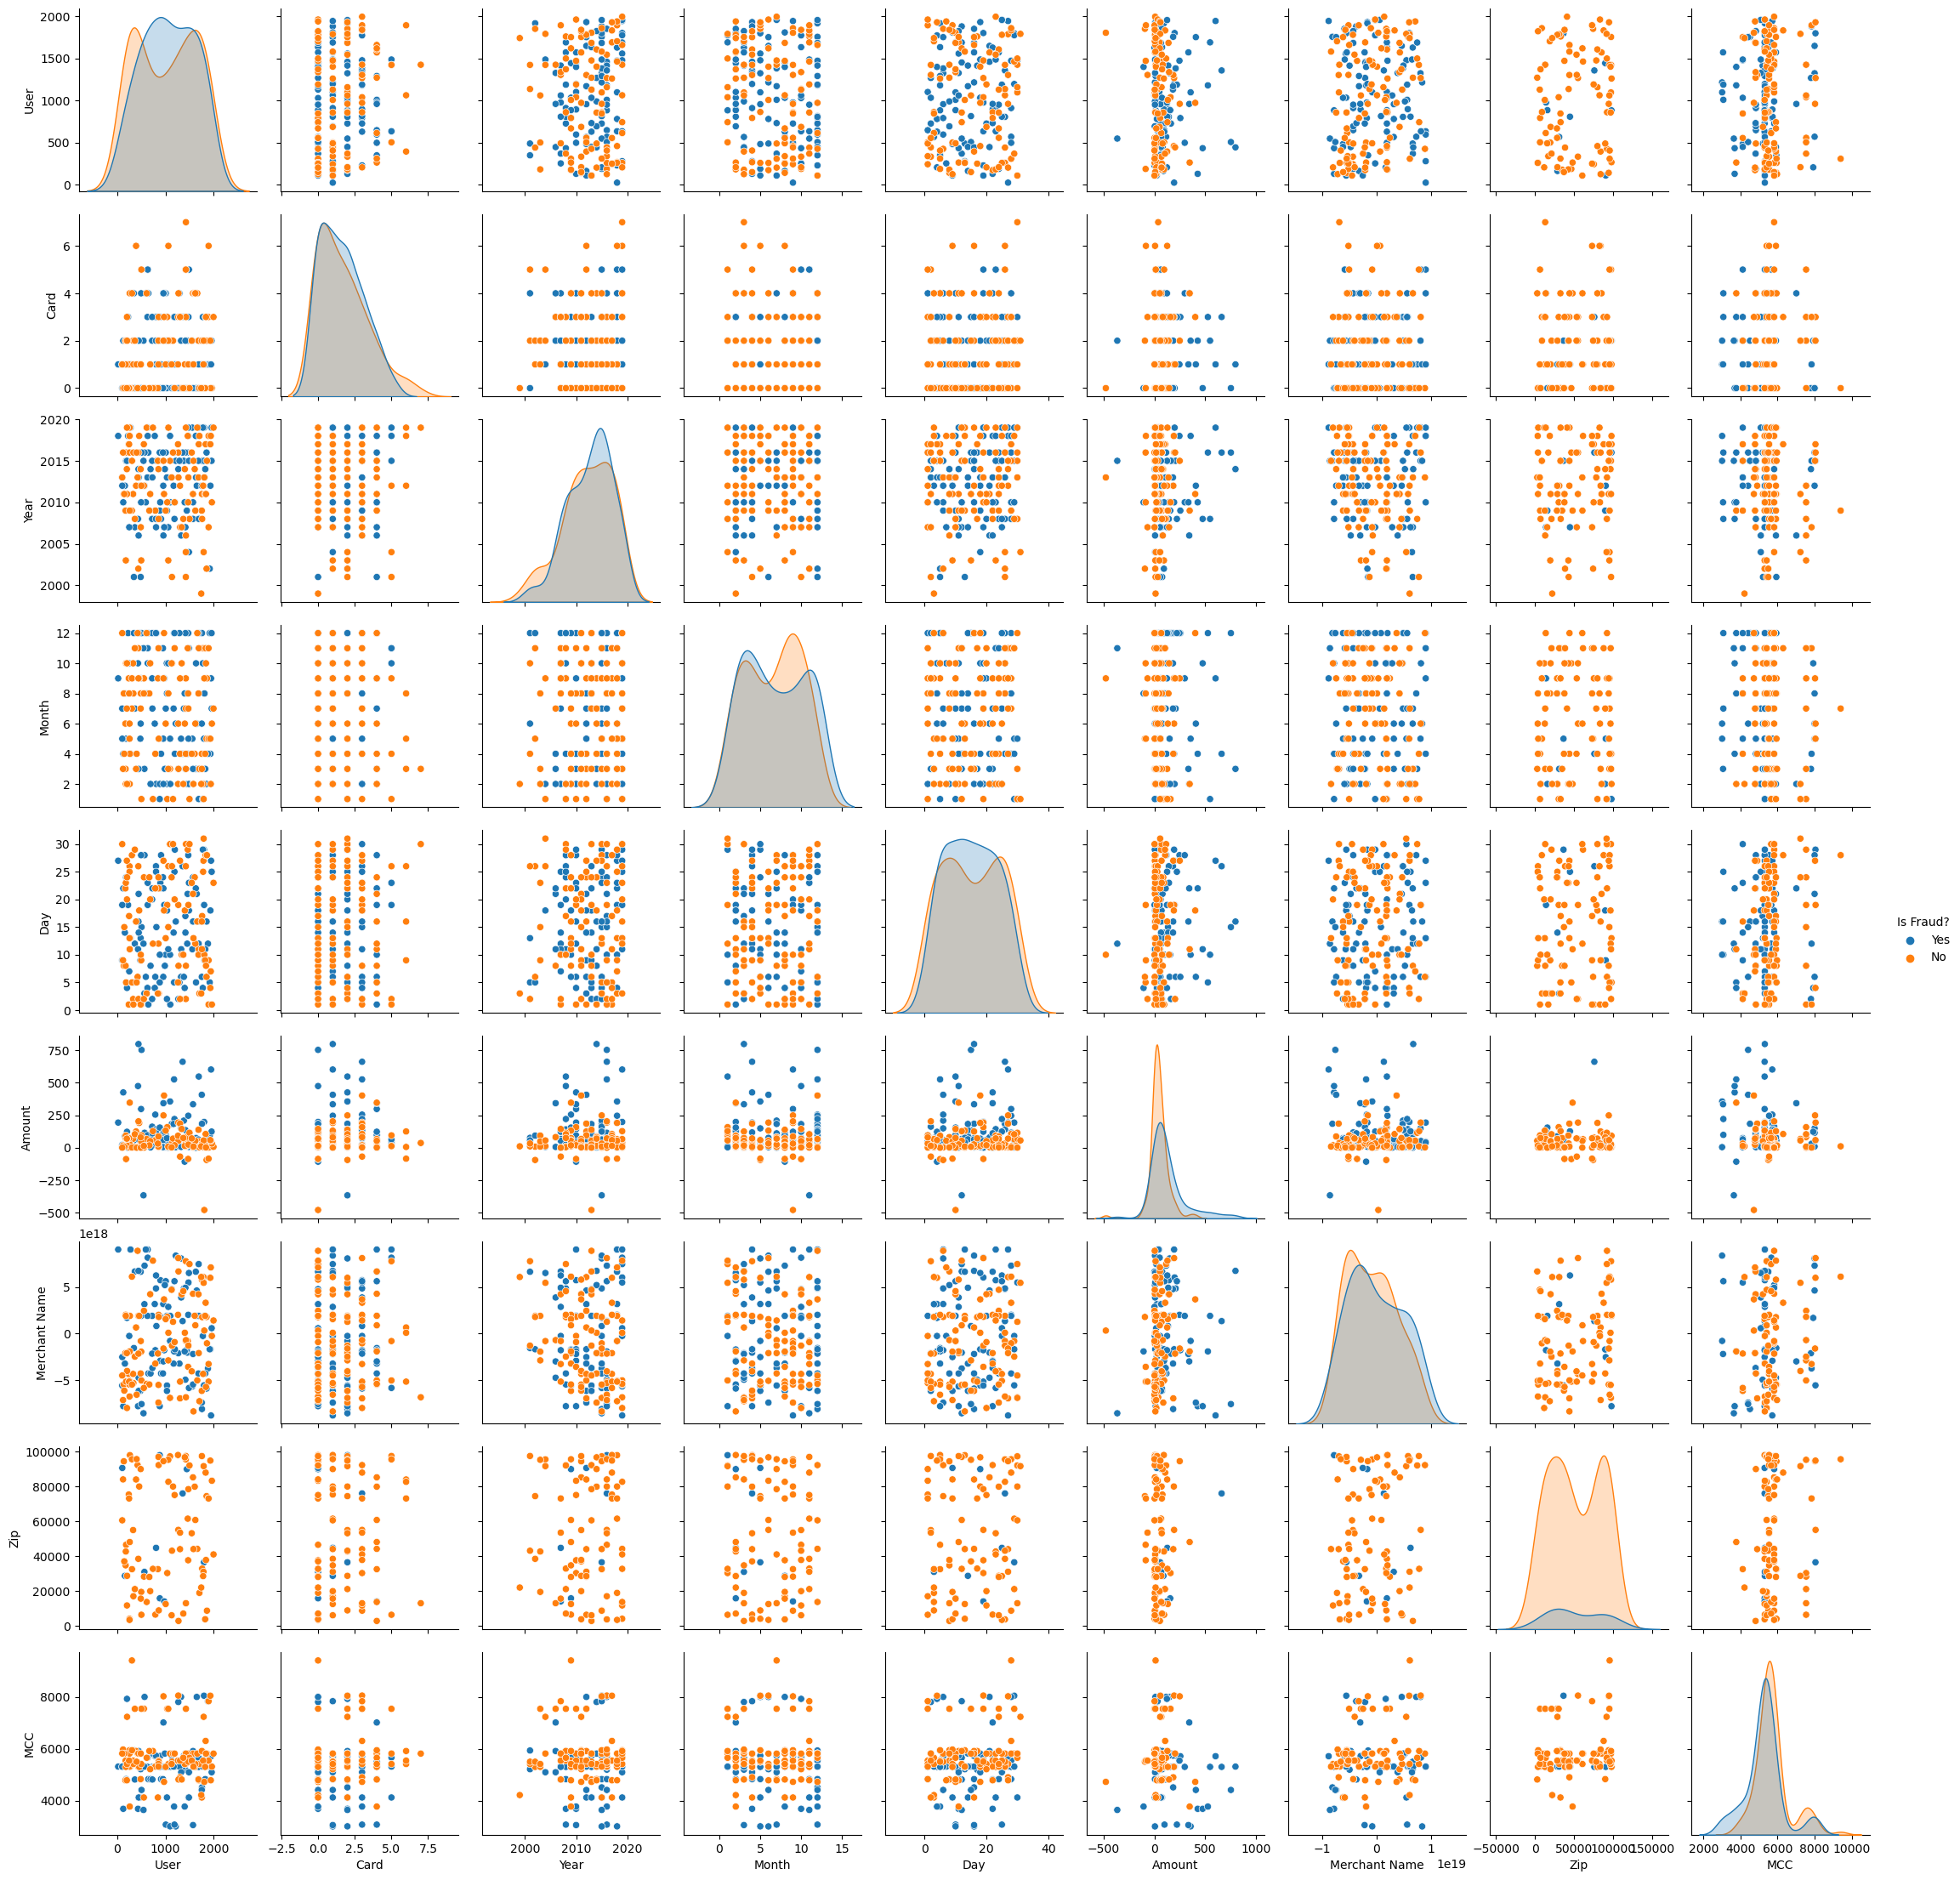

In [5]:
df_cct_fraud = df_cct[df_cct['Is Fraud?']=='Yes'].sample(100)
df_cct_no_fraud = df_cct[df_cct['Is Fraud?']=='No'].sample(100)
df_cct_sample = pd.concat([df_cct_fraud,df_cct_no_fraud])

sns.pairplot(df_cct_sample,hue="Is Fraud?")

## 0. Null transactions

In [6]:
df_cct["Is Null?"] = df_cct["Amount"].apply(lambda x: 1 if x== 0 else 0)

In [7]:
df_null = df_cct[df_cct["Amount"] == 0]

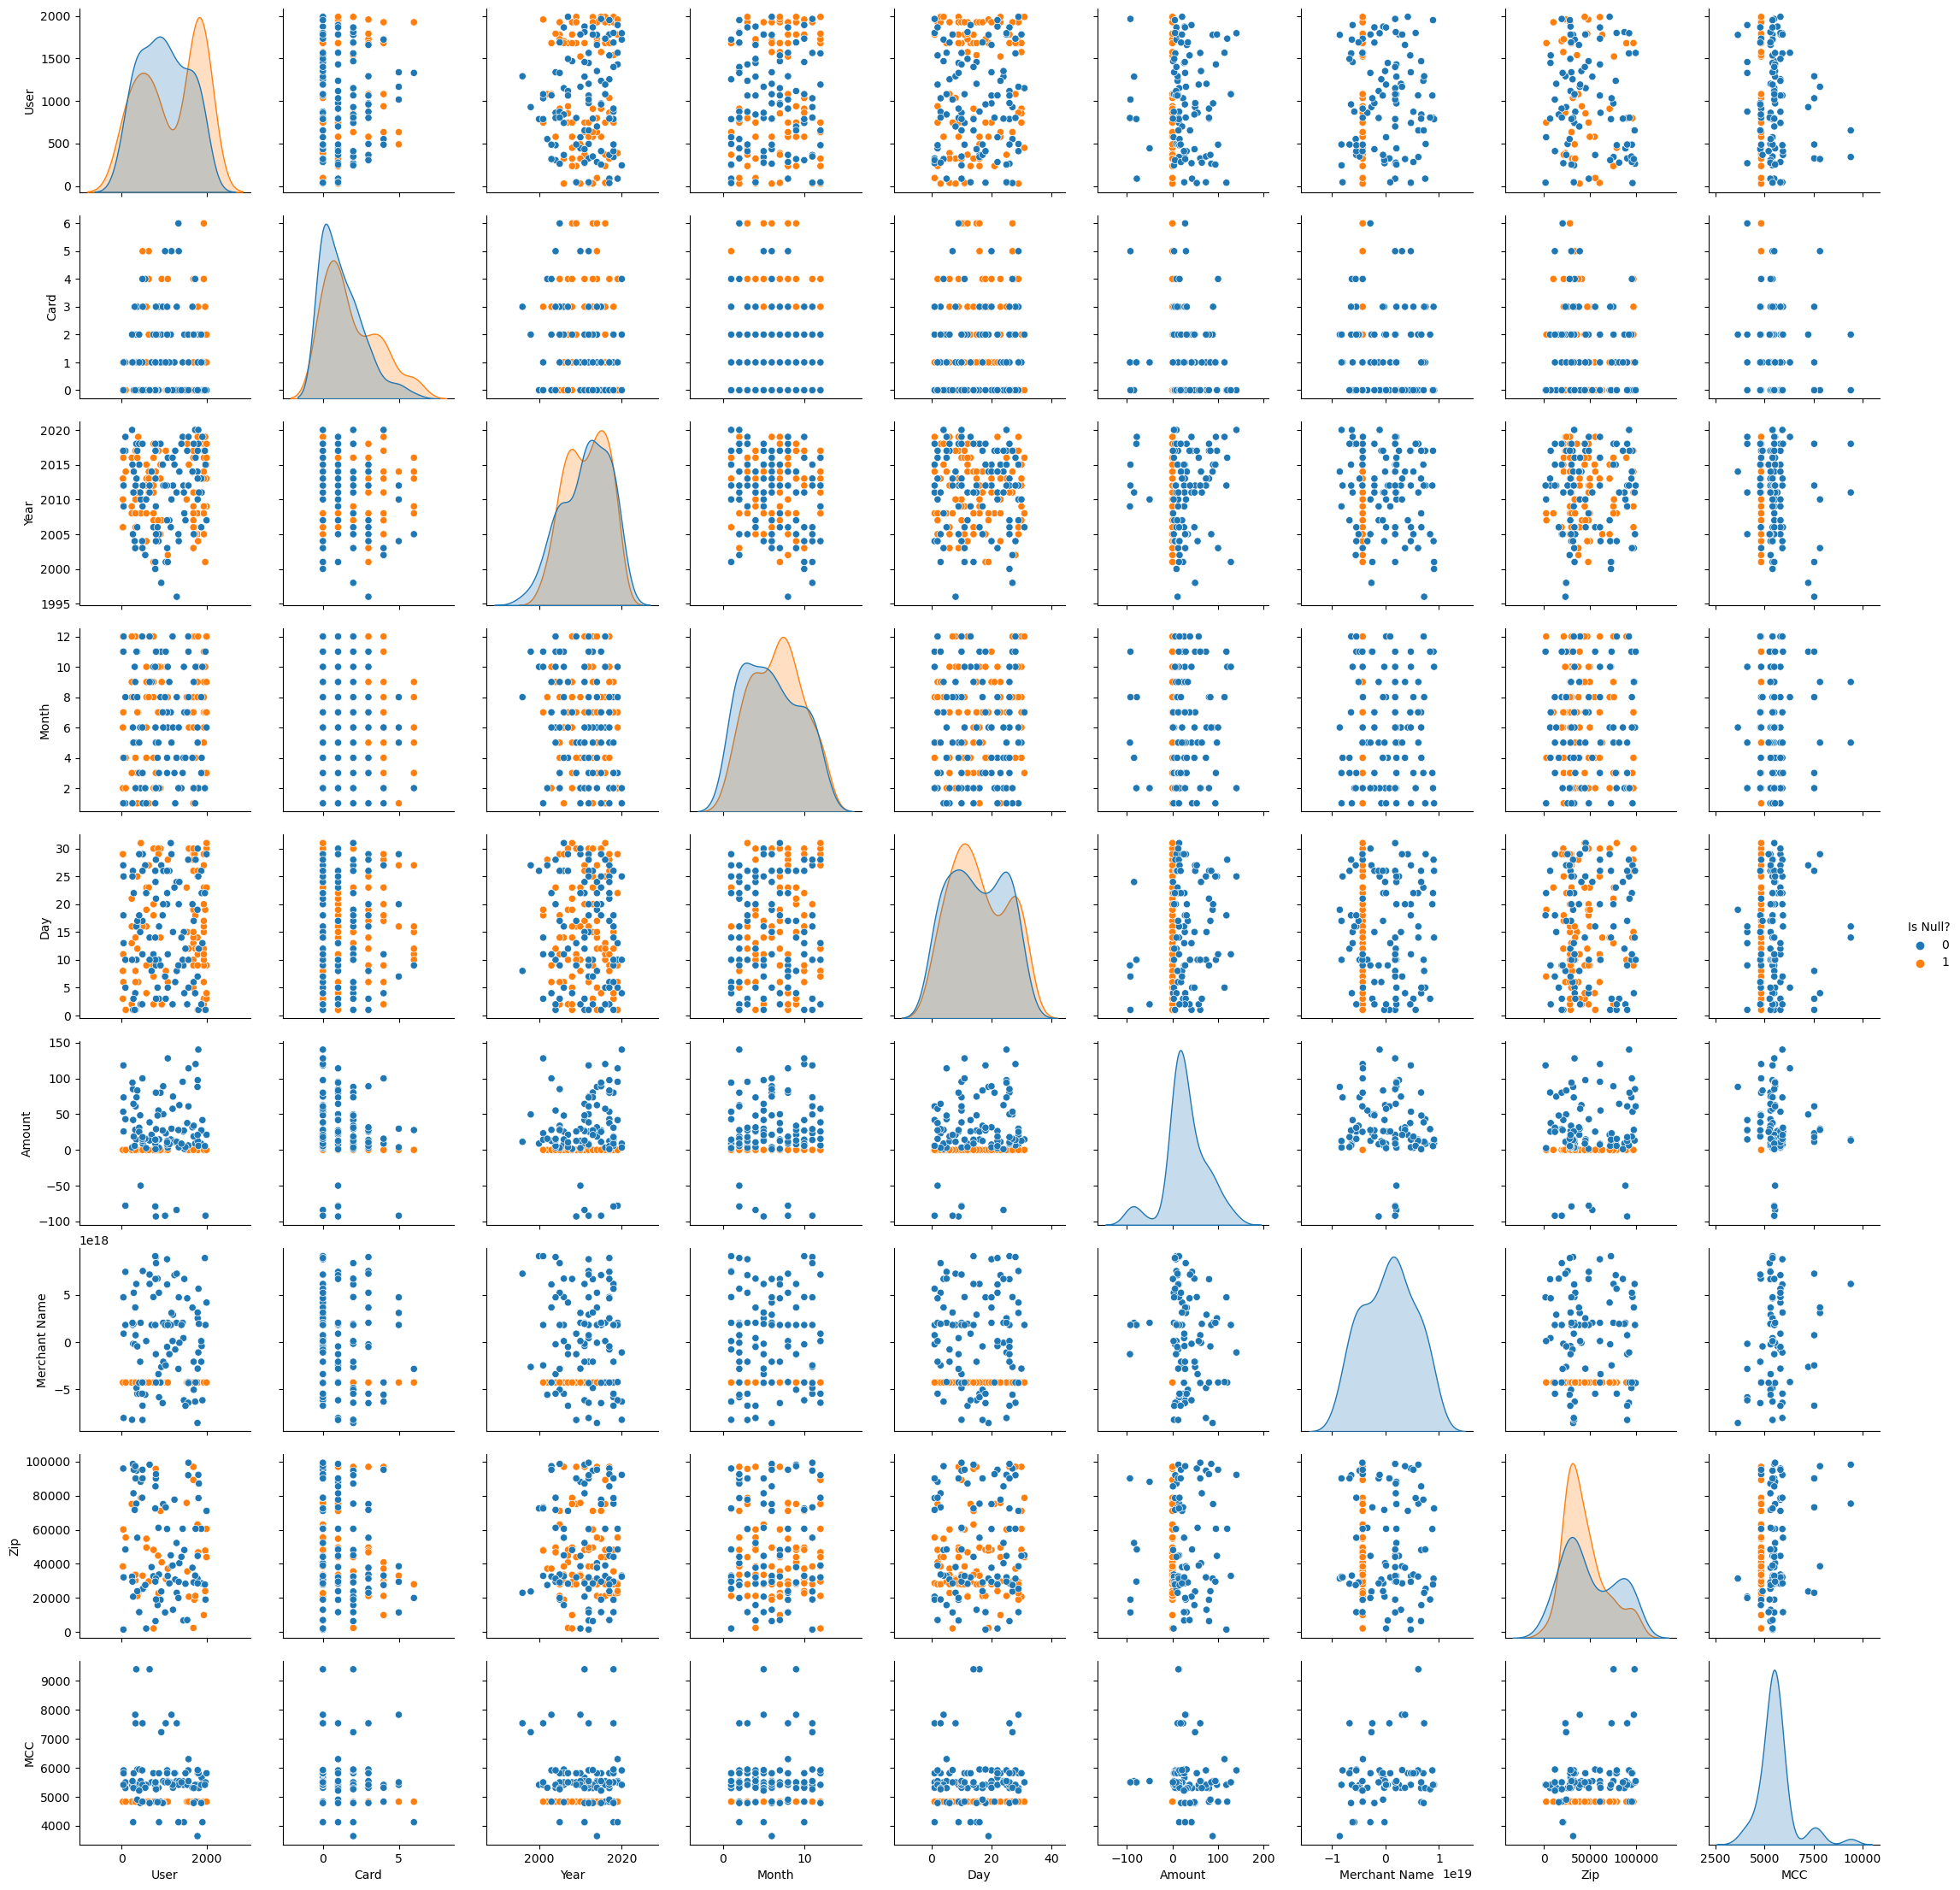

In [8]:
df_cct_null = df_cct[df_cct['Is Null?']==1].sample(100)
df_cct_no_null = df_cct[df_cct['Is Null?']==0].sample(100)
df_cct_sample = pd.concat([df_cct_null,df_cct_no_null])

sns.pairplot(df_cct_sample,hue="Is Null?")

## I. Fraudulent transactions

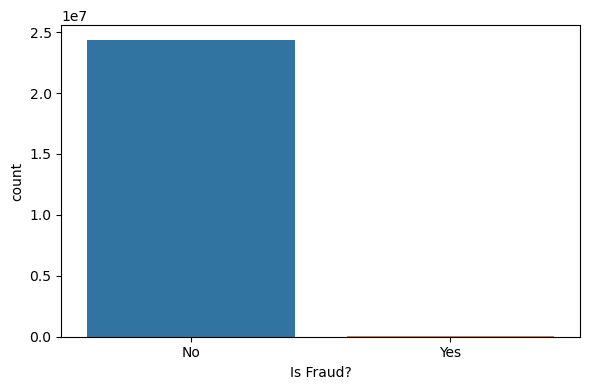

In [9]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x="Is Fraud?", data = df_cct)
plt.tight_layout()

##### => the classes "Yes" and "No" for "Is Fraud?" are heavily imbalanced

## II. Transaction Times (hr) VS Fraud

In [10]:
df_cct[['Hours', 'Minutes']] = df_cct.Time.str.split(":", n=1, expand=True) #scinder la colonne Time en 2
df_cct["Hours"] = df_cct["Hours"].astype(int)
df_cct["Minutes"] = df_cct["Minutes"].astype(int)

Text(0.5, 1.0, 'Transaction times')

<Figure size 960x320 with 0 Axes>

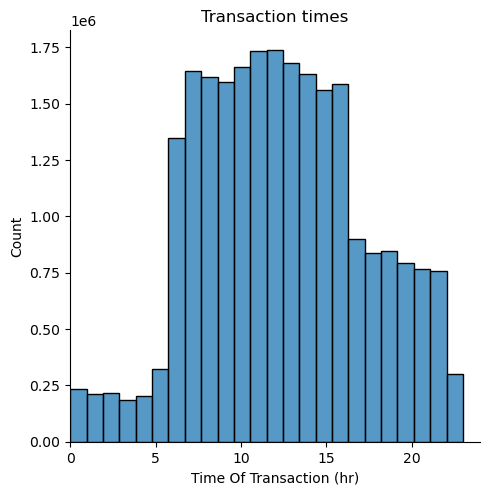

In [11]:
plt.figure(figsize=(12,4), dpi = 80)
sns.displot(df_cct["Hours"], bins = 24)
plt.xlim([0,24])
plt.xticks(np.arange(0,24,5))
plt.xlabel("Time Of Transaction (hr)")
plt.ylabel('Count')
plt.title('Transaction times')

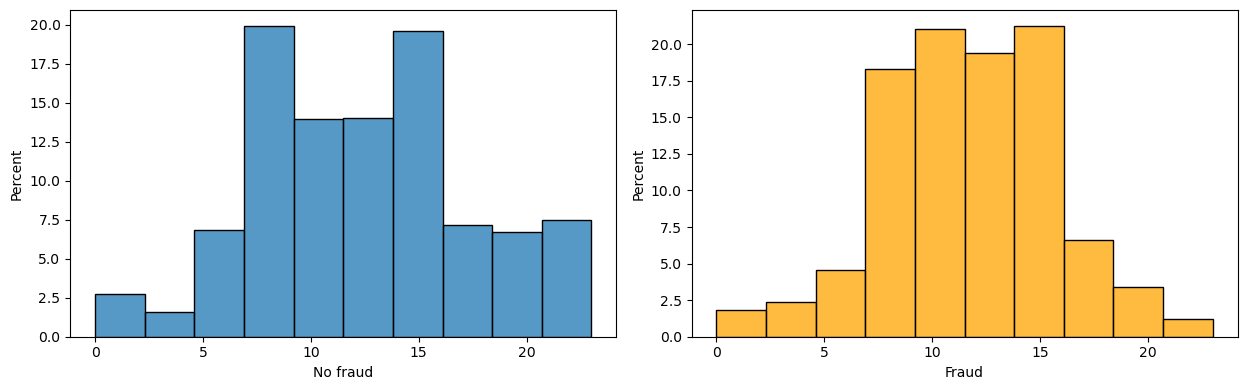

In [20]:
plt.figure(figsize=(25,4))

plt.subplot(1,4,1)
sns.histplot(x='Hours',data=df_cct[df_cct["Is Fraud?"] == 'No'], bins=10,stat='percent')
plt.xlabel("No fraud")

plt.subplot(1,4,2) 
sns.histplot(x='Hours',data=df_cct[df_cct["Is Fraud?"] == 'Yes'], bins=10,stat='percent', color = 'orange')
plt.xlabel("Fraud")

plt.tight_layout()
plt.show()

#### => Fraudulent transactions happen a lot at noon/beginning of the afternoon

## III. Amounts vs Fraud

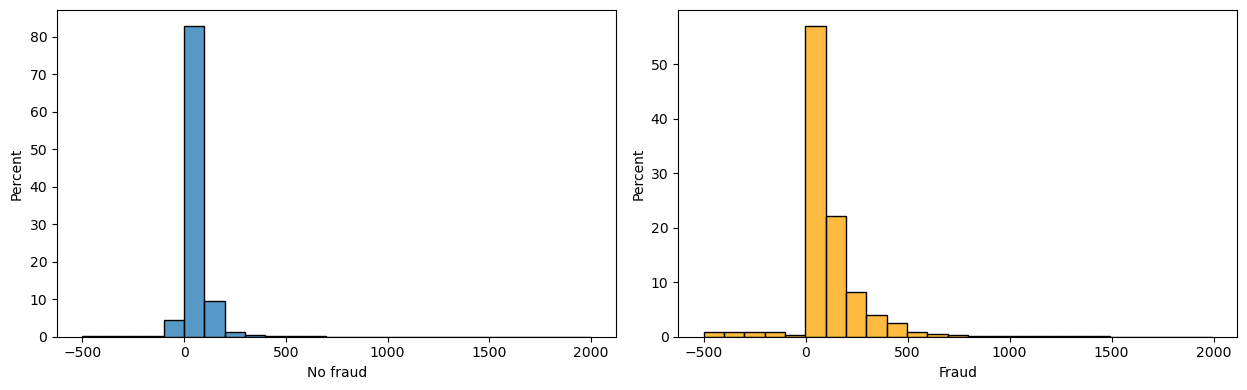

In [25]:
plt.figure(figsize=(25,4))

plt.subplot(1,4,1)
sns.histplot(x='Amount',data=df_cct[(df_cct["Is Fraud?"] == 'No') & (df_cct["Amount"] < 2000) ], bins=25,stat='percent')
plt.xlabel("No fraud")

plt.subplot(1,4,2) 
sns.histplot(x='Amount',data=df_cct[(df_cct["Is Fraud?"] == 'Yes') & (df_cct["Amount"] < 2000) ], bins=25,stat='percent', color = 'orange')
plt.xlabel("Fraud")

plt.tight_layout()
plt.show()

#### => Ranges of amounts are more scattered among fraudulent transactions

## IV. State VS Fraud

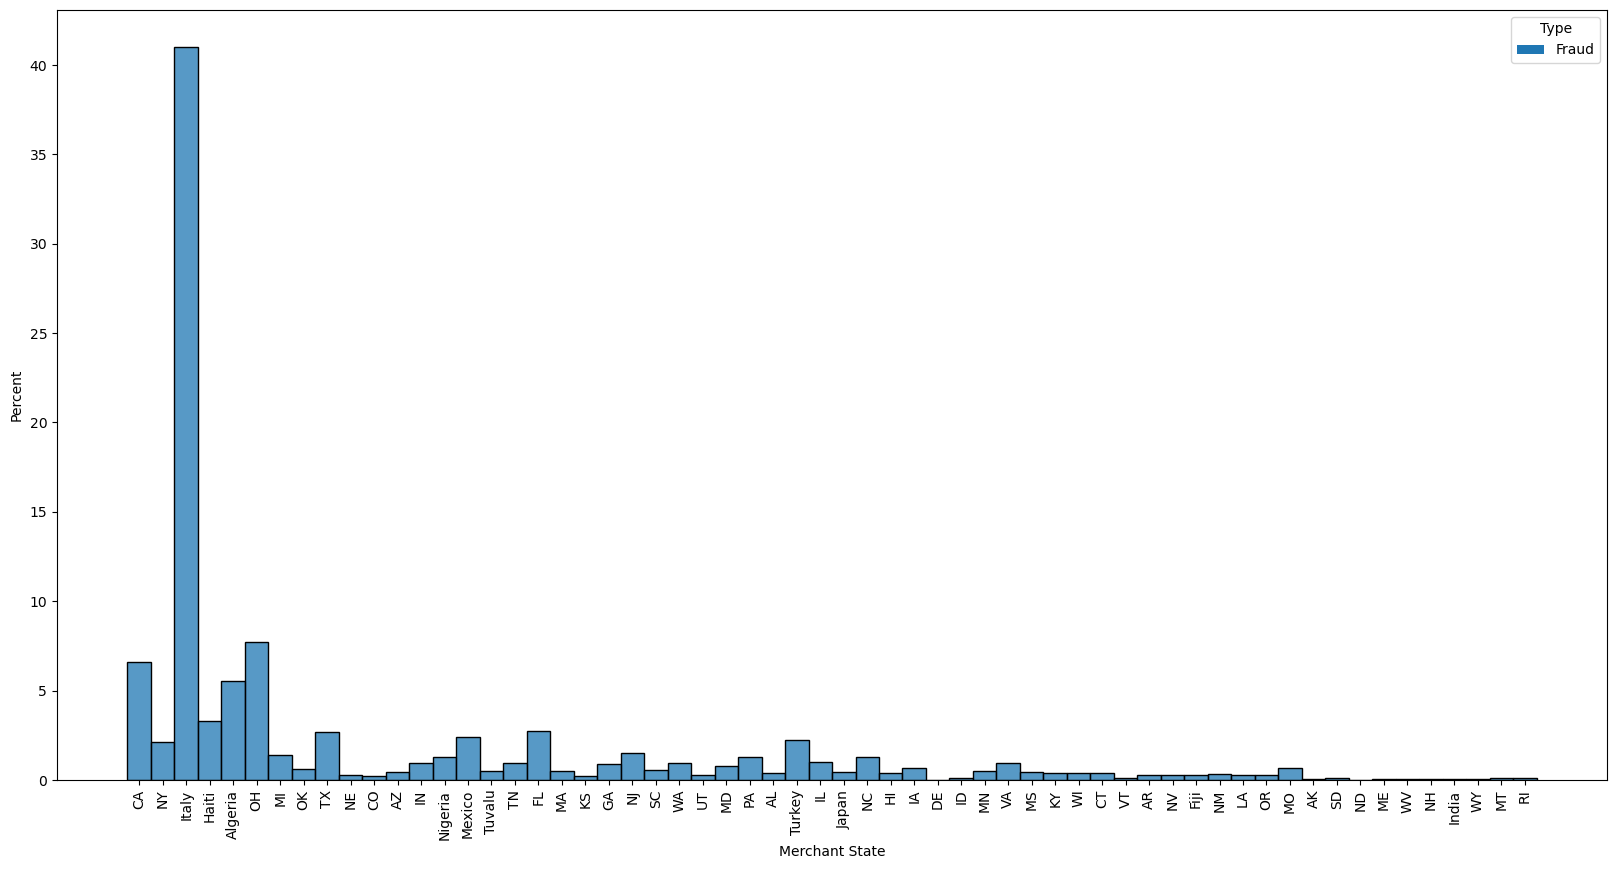

In [15]:
# State vs fraud
f, ax = plt.subplots(figsize=(20, 10))
ax=sns.histplot(x='Merchant State',data=df_cct[df_cct["Is Fraud?"] == "Yes"],stat='percent',multiple='dodge',common_norm=False)
plt.xticks(rotation=90)
plt.legend(title='Type', labels=['Fraud'])
plt.show()

## V. Use Chip VS Fraud

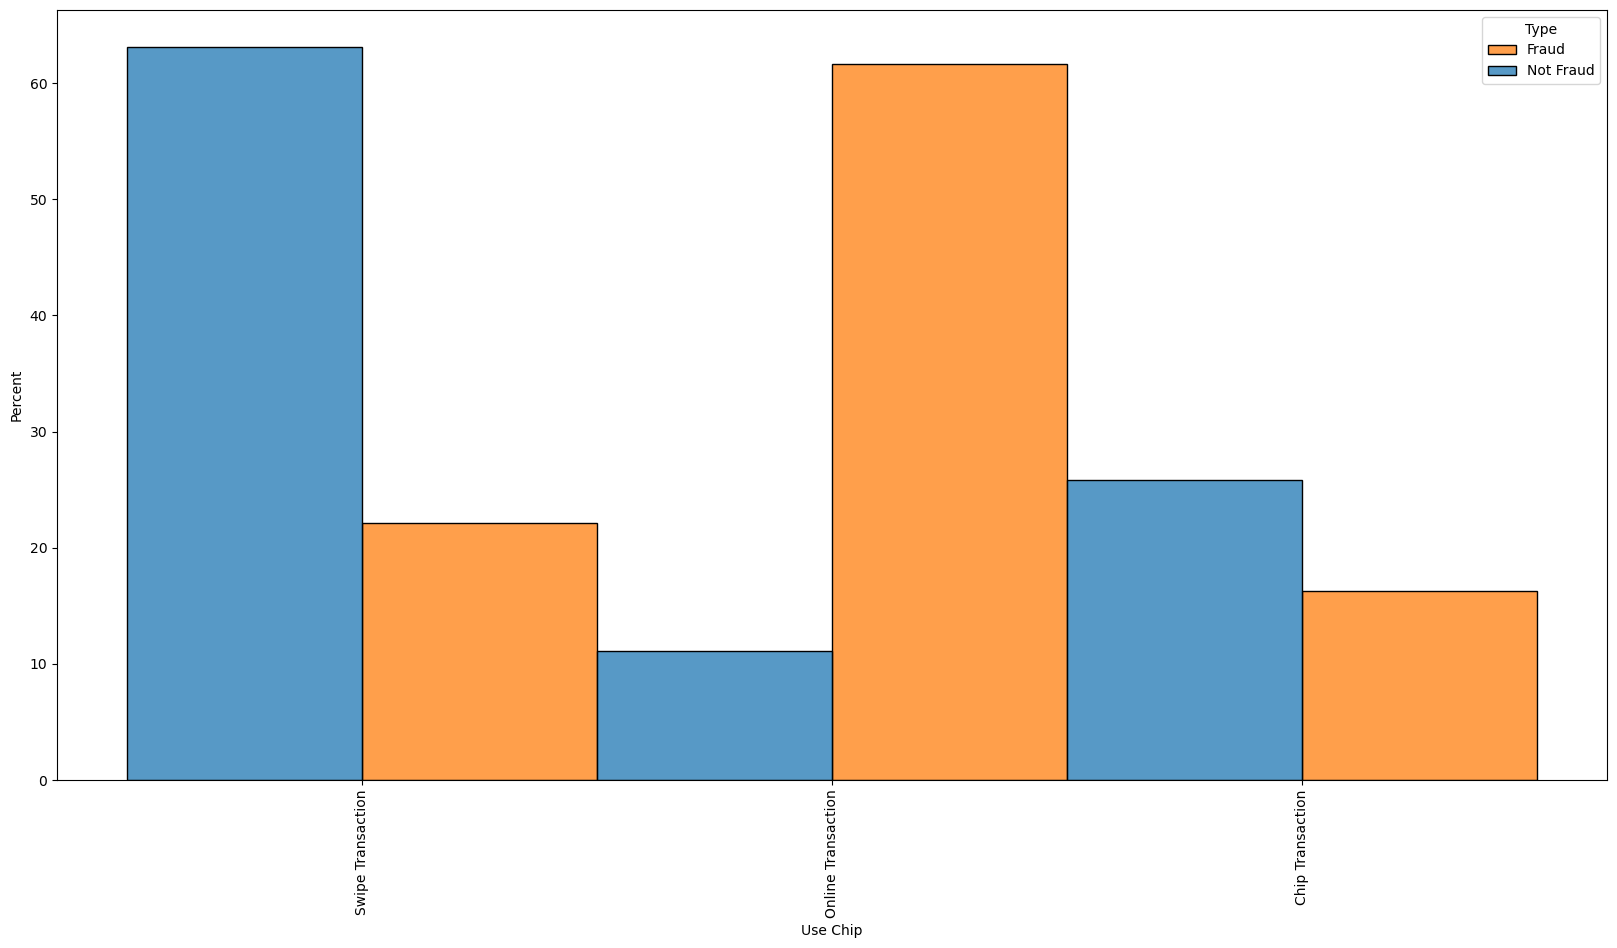

In [16]:
# State vs fraud
f, ax = plt.subplots(figsize=(20, 10))
ax=sns.histplot(x='Use Chip',data=df_cct, hue = "Is Fraud?", stat='percent',multiple='dodge',common_norm=False)
plt.xticks(rotation=90)
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
plt.show()